# PREDICTION OF SYRIATEL COMPANY CUSTOMER CHURN

##### Author: Nelson Kibet kemboi

![Alt Text](dsc-phase-3-project-v2-3\images\churn.lnk)


## Business Understanding 

Due to increased competition in telecommunication industry there as been concerns on predicting the customer churn in order to retain customers. In order to maintain competitive parity by SyriaTel company customer retention is a key to the business. Since retaining customers will be cheaper than acquiring new ones it is therefore paramount to deduce ways of making sure customers are not lost by the SyriaTel company. By analyzing various data points and using predictive analytics, SyriaTel company will identify patterns and indicators that help them anticipate customer behavior and take proactive measures to reduce churn rates. Therefore SyriaTel is seeking to models that will predict whether customers are likely to churn or not hence taking a proactive measures to retain them.data on demographics like location and usage patterns like calls, charge etc will be used to analyze and build predictive machine learning models, hence SeriaTel must continuously adapt its models to reflect changing customer behavior and market dynamics to ensure its retention strategies remain effective.
 
### Objectives 
* Create machine learning models that can predict customer churn by using data to analyze customer features.
* Comparing the build machine learning models and determine the most accurate model in prediction.  
* The analysis aims to identify the specific features that have a significant impact on the customer churn rate in SyriaTel, provide valuable recommendations based on the findings hence help to mitigate churn rates in the company and improve customer retention. 


## Data Understanding 
This helps to us to acquire knowledge and comprehension about this dataset before further analysis and modeling.

In [1]:
#importing relevant libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import multiprocessing # for reducing the runtime of gridsearch 

# Ignore warnings
warnings.filterwarnings("ignore")



In [2]:
#reading the csv file to read and check the data 
seriatel_df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
seriatel_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#checking the shape of the data
seriatel_df.shape

(3333, 21)

In [4]:
# checking for data information 
seriatel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* It can be seen that the columns of phone number and account length are not important for this analysis hence we drop them 
* There are categorical and numerical columns in the dataset



In [5]:
#dropping irrelevant columns 
seriatel_df= seriatel_df.drop(columns= ['phone number', 'account length'], axis=1)
seriatel_df.head()

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#separating categorical and numerical colums for easier analysis 
numerical_df = seriatel_df[['area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']]
categorical_df = seriatel_df[['state', 'churn', 'international plan', 'voice mail plan']]

#### Checking for duplicates and NaN values

In [7]:
#checking for missing values 
seriatel_df.isna().sum()

state                     0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
#checking for duplicates 
seriatel_df.duplicated().value_counts()

False    3333
dtype: int64

As seen from the checklist above we have no mising values, nor duplicates hence the data is clean for further analysis

### Exploratory Data Analysis

In [9]:
# getting basic statistics of our dataset 
seriatel_df.describe()

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


* From the basic statistics we can gain initial insights into the data's distribution, central tendency, and variability. 

### Visualization of relationships in columns

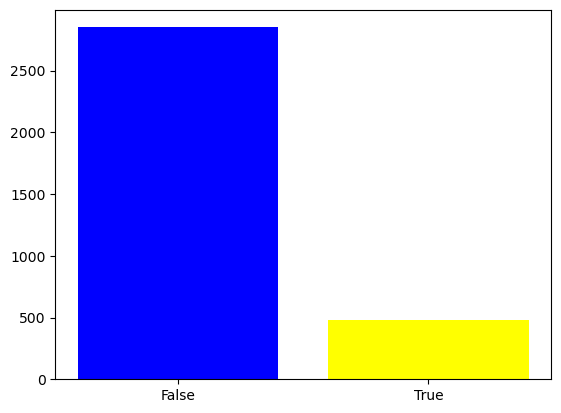

In [10]:
#checking the percentage of loyal customers using visual 
churn_counts = seriatel_df['churn'].replace({0: 'False', 1: 'True'}).value_counts()

# Plot the bar chart with the correct labels
plt.bar(['False', 'True'], churn_counts.values, color=['blue', 'yellow'], tick_label=['False', 'True'])
plt.show()


* It can be seen that most of the customers are not loyal to the Serialtel company

In [11]:
# determining the total calls made by state
seriatel_df['total_calls'] = seriatel_df['total day calls'] + seriatel_df['total eve calls'] + seriatel_df['total night calls'] + seriatel_df['total intl calls']
seriatel_df.groupby('state')['total_calls'].sum().sort_values(ascending=False)

state
WV    32523
MN    25807
NY    25092
AL    24070
OH    24060
WY    23751
OR    23497
VA    23483
WI    23463
ID    22722
MI    22657
CT    22492
VT    22146
TX    22144
IN    22096
UT    21761
KS    21426
NC    21172
NJ    20970
MD    20868
MT    20377
WA    20084
NV    20023
MS    19911
FL    19797
AZ    19671
MA    19602
RI    19525
CO    19434
ND    19394
MO    19348
NM    19278
ME    19075
OK    18930
NE    18718
SC    18397
DE    18392
KY    17971
IL    17752
SD    17517
GA    17087
AR    16705
NH    16585
DC    16401
HI    16188
TN    16102
LA    15523
AK    15288
PA    13637
IA    13528
CA    10582
Name: total_calls, dtype: int64

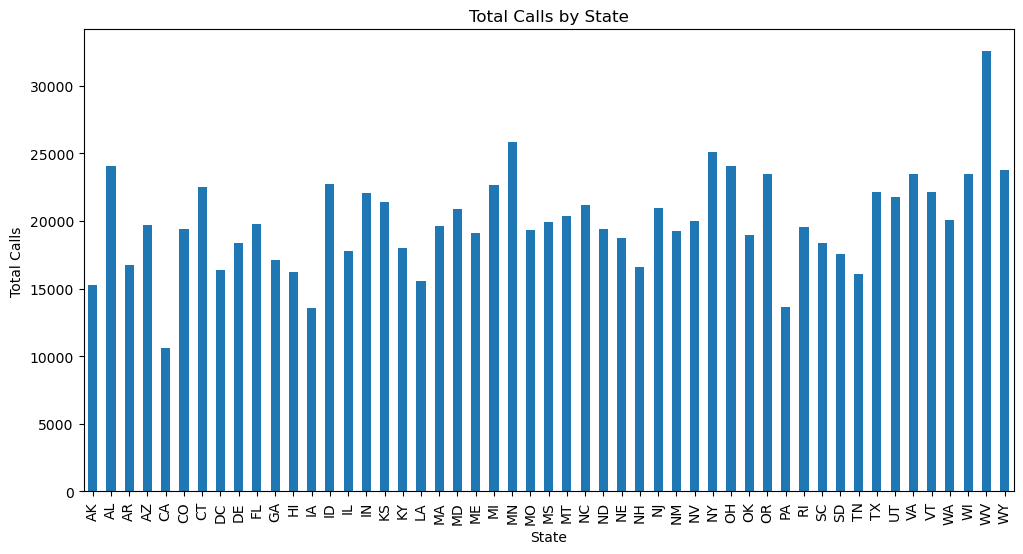

In [12]:
#visualizing the total calls per state 
seriatel_df.groupby('state')['total_calls'].sum().plot(kind='bar', figsize=(12, 6), rot=90)

# Add labels and title to the plot
plt.title('Total Calls by State')
plt.xlabel('State')
plt.ylabel('Total Calls')

# Display the plot
plt.show()


* Most states from the chart above shows more than `15,000` in avegage calls made. 
* `WV` which is west virginia is the state leading in making calls with `32523.` 
* The state with least total calls is `CA` which is California with `10582` calls.


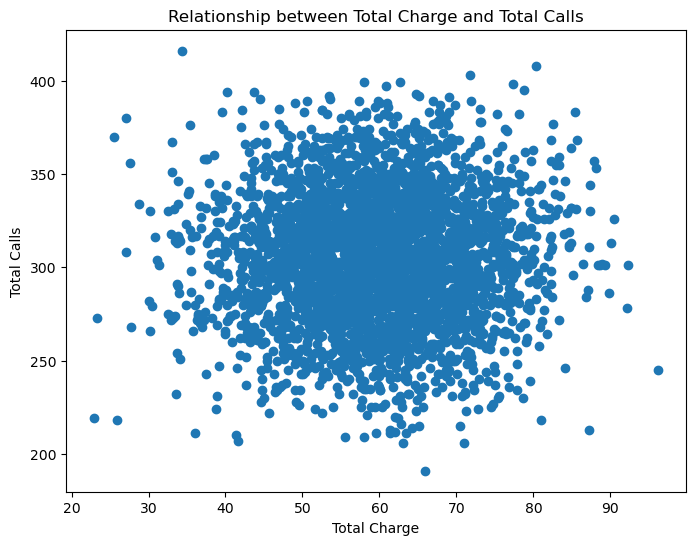

In [13]:
#visualizing the total charge of calls per area code
#creating total charge columns
seriatel_df['total_charge'] = seriatel_df['total day charge'] +seriatel_df['total eve charge'] + seriatel_df['total night charge'] + seriatel_df['total intl charge']
#ploting a comparison with state
plt.figure(figsize=(8, 6))
plt.scatter(seriatel_df['total_charge'], seriatel_df['total_calls'])
plt.xlabel('Total Charge')
plt.ylabel('Total Calls')
plt.title('Relationship between Total Charge and Total Calls')
plt.show()

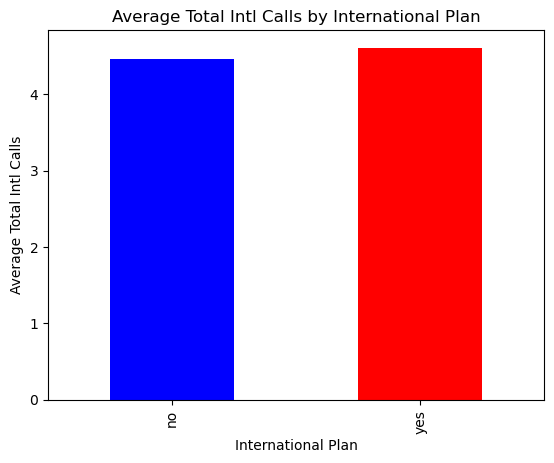

In [14]:
#visualizing for the international calls made by people 
# Group by 'international plan' and calculate the mean of 'total intl calls'
grouped_data = seriatel_df.groupby('international plan')['total intl calls'].mean()

# Plot the bar plot
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', color=['blue', 'red'], ax=ax)

# Add labels and title to the plot
ax.set_xlabel('International Plan')
ax.set_ylabel('Average Total Intl Calls')
ax.set_title('Average Total Intl Calls by International Plan')

# Display the plot
plt.show()



* From the bar graph above it can be seen that there is no much different by people who make international calls in terms of getting international plan.
* In average there almost same number of people getting international plan from the most international calls and from the ones who do not make oftenly. 

<AxesSubplot:xlabel='count', ylabel='customer service calls'>

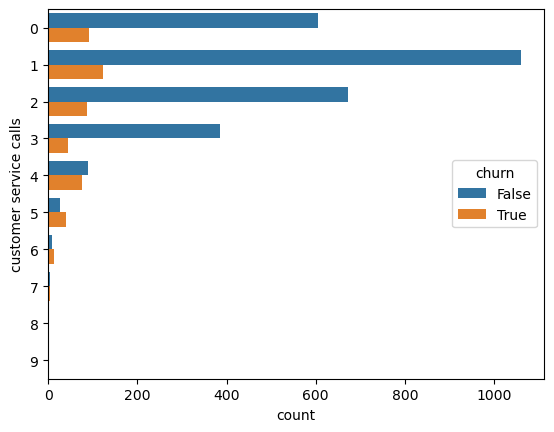

In [15]:
#visualizing the relationship between the number of calls to the call center and loyalty

sns.countplot(y='customer service calls', hue='churn', data=seriatel_df) #using searbon to plot the countplot

The chart above depicts the relationship between the number of calls to the call center and loyalty. The chart shows that there is no much relationship betwen calls and loyalty as most people making the calls are not loyal to Syriatel hence having high probalility of switching 

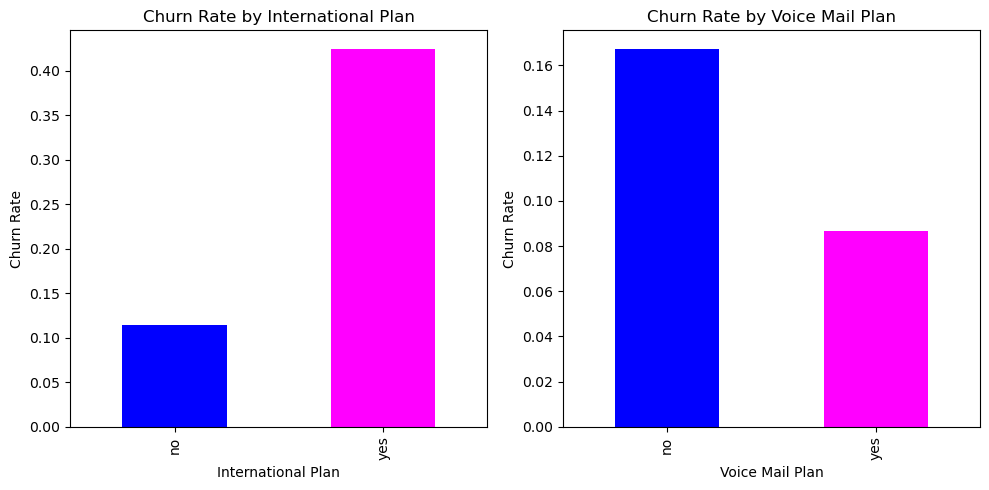

In [16]:
#visualizing for the international calls made by people 
# Map the values in 'voice mail plan' column to labels

# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot: International Plan
seriatel_df.groupby('international plan')['churn'].mean().plot(kind='bar', ax=axes[0], color=['blue', 'magenta'])
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('Churn Rate by International Plan')

# Plot the second subplot: Voice Mail Plan
seriatel_df.groupby('voice mail plan')['churn'].mean().plot(kind='bar', ax=axes[1], color=['blue', 'magenta'])
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Churn Rate by Voice Mail Plan')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



* Looking at the graph above shows that there is more customers loyalty by international plan subscribers.  
* Customers have higher rate of churna and higher probabiliy to churn in terms of voice mail plan.  
* This shows that customers are more happy with international plan than voice mail plan.   

### Outliers 

In [17]:
#writing a function to check for outliers 
def detect_outliers(data):
# Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
# determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# identifying outliers 
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [18]:
detect_outliers(numerical_df).sum()

area code                    0.00
number vmail messages       51.00
total day minutes         3928.20
total day calls           1807.00
total day charge           667.81
total eve minutes         4175.90
total eve calls           1836.00
total eve charge           354.95
total night minutes       6180.80
total night calls         2647.00
total night charge         278.13
total intl minutes         286.60
total intl calls          1001.00
total intl charge           91.57
customer service calls    1223.00
dtype: float64

In [19]:
def remove_outliers(data):
    # Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_data

In [20]:
filtered_data = remove_outliers(numerical_df)

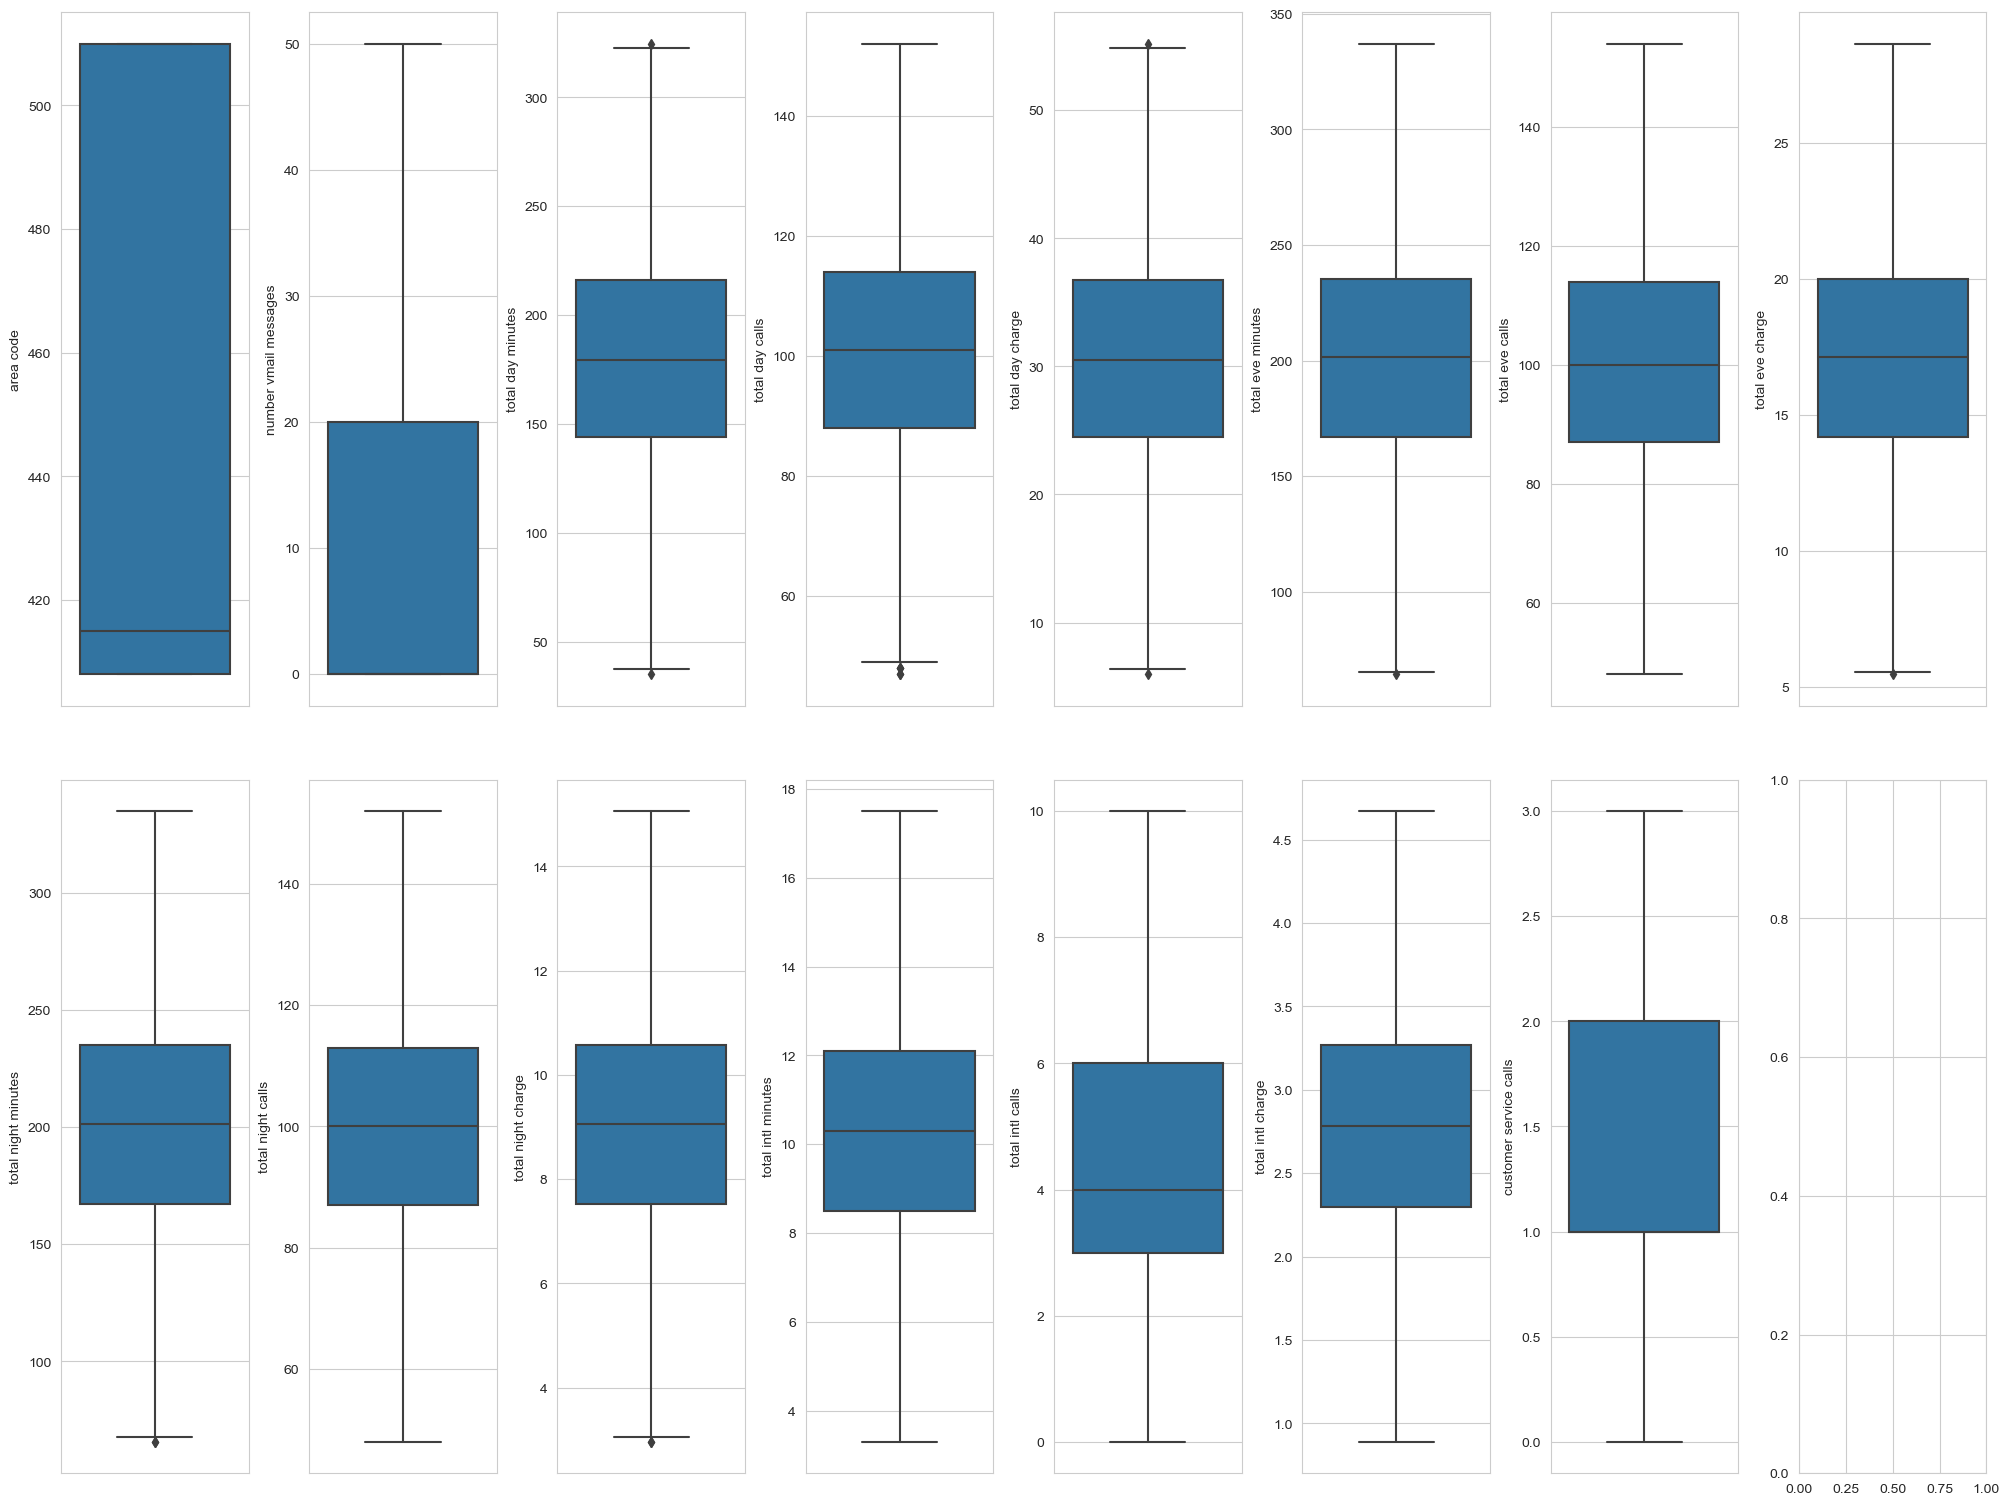

In [21]:
#checking for any outliers in the dataset using box plot 
# visualizing with matplotlib and seaborn 
sns.set_style('whitegrid')
fig,ax = plt.subplots(ncols=8,nrows =2,figsize = (20,15))
index = 0 
ax = ax.flatten()
for col,value in filtered_data.items():
    sns.boxplot(y = col,data = filtered_data,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

After exploring our dataset and getting more insights it is paramount now to do modelling for futher analysis of the data

## Data Preparation

### selecting most important feactures for our modelling 

In order to select best features for modelling we will use heatmap to check the correlation existing between variables to be used in the model

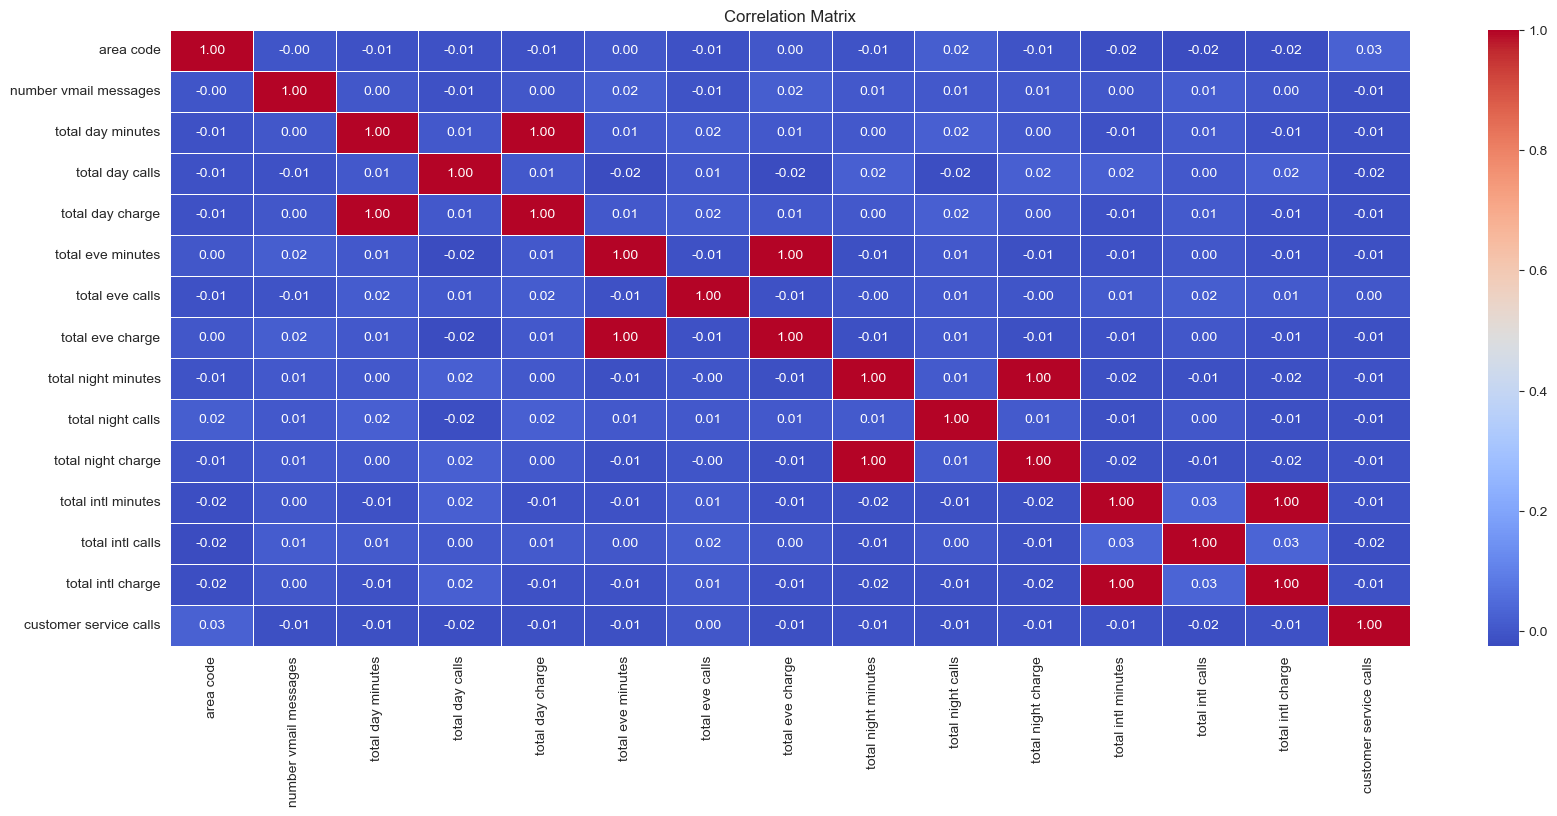

In [22]:
#using heatmap to check for correlation 
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


* As seen from the heatmap there are some variables that have `1` that is perfect correlation with other variables.
* Multicollinearity will occur if this predictor variables are highly correlated, which can lead to instability and unreliable estimates of the model parameters.
* Hence we will remove one of the correlacetd factors which is `total day minutes`, `total eve minutes`, /`total night minutes` and `total intl minutes` 
* Drop `area code` since its not imporant for modelling
* also we will drop `state` which is categorical variable since its of least importance in modelling

### Dropping perfect correlated variable

In [23]:
#droping features with perfect correlation using our previous seriatel_df 
new_seriatel_df = seriatel_df.drop(columns=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'area code', 'state'], axis=1)



In [24]:
#checking for the shape of the data
new_seriatel_df.shape

(3333, 15)

* The final values from here are the ones to be used for modelling since the 15 columns are suitable for analysis


### Transforming categorical variables using OHE 

In [25]:
#transformimg categorical data using OHE

# Select the categorical columns to be one-hot encoded
categorical_columns = ['international plan', 'voice mail plan']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(new_seriatel_df[categorical_columns])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names(categorical_columns))

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
final_df = pd.concat([new_seriatel_df.drop(categorical_columns, axis=1), encoded_df], axis=1)

final_df


,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,total_calls,total_charge,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,303,75.56,1.0,0.0,0.0,1.0
1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,332,59.24,1.0,0.0,0.0,1.0
2,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,333,62.29,1.0,0.0,1.0,0.0
3,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,255,66.80,0.0,1.0,1.0,0.0
4,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,359,52.09,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,77,26.55,126,18.32,83,12.56,6,2.67,2,False,292,60.10,1.0,0.0,0.0,1.0
3329,0,57,39.29,55,13.04,123,8.61,4,2.59,3,False,239,63.53,1.0,0.0,1.0,0.0
3330,0,109,30.74,58,24.55,91,8.64,6,3.81,2,False,264,67.74,1.0,0.0,1.0,0.0
3331,0,105,36.35,84,13.57,137,6.26,10,1.35,2,False,336,57.53,0.0,1.0,1.0,0.0


In [26]:
#convert churn using label ecoder using a function
def encode(column):
    le = LabelEncoder()
    final_df[column] = le.fit_transform(final_df[column])
#encoding the column 
encode('churn')
#checking for encorded churn column
final_df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

### Train test split
THis will be used to test the data and used to evaluate the performance of the trained model on unseen data. By evaluating the model on the test set, we can get an estimate of how well the model generalizes to new, unseen data.

In [27]:
#using the standard scaler to standardize the data 
# Split the data into features (X) and target variable (y)
X = final_df.drop(columns='churn', axis=1)
y = final_df['churn']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data preprocessing 
* We will use standardization to rescale the features of a seritel_df dataset to have zero mean and unit variance. 
* This process will helps us to bring all features to a similar scale, which can be beneficial for our machionel leanring algorithms that are sensitive to the scale of the input features.

In [28]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### using SMOTE to remove class imbalance
* SMOTE helps us to address this class imbalance issue by creating synthetic samples of the minority class to balance the dataset.

In [29]:
# Creating a instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



## Building a baseline logistic regression model 

In [30]:
# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the testing data
y_pred = logreg.predict(X_test)

In [31]:
# defining a function that calculates the metrics of logistic regression 

def evaluate_model_metrics(model, X_test, y_test):

    # Calculate evaluation metrics
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    accuracy = accuracy_score(y_test, y_pred)

    # Return results
    results = {
        'roc_auc': roc_auc,
        'accuracy': accuracy,
        'confusion_matrix': cm_display
    }
    return results




In [32]:
#creating a function for checking for classification report 

def generate_classification_report(y_test, y_pred):
    # Generate classification report with output_dict=True
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Convert the report to a DataFrame
    report = pd.DataFrame(report_dict).transpose()

    return report




In [33]:
# calling the function to get classifification report values
generate_classification_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.892035,0.890459,0.891247,566.000000
1,0.392157,0.396040,0.394089,101.000000
accuracy,0.815592,0.815592,0.815592,0.815592
macro avg,0.642096,0.643249,0.642668,667.000000
weighted avg,0.816342,0.815592,0.815965,667.000000



* Precision: The precision values for class 0 and class 1 are `0.892` and `0.392`, respectively. A higher precision indicates that the model has a low rate of false positives for that class. Class 0 has a higher precision than class 1, suggesting that the model is better at predicting class 0 than class 1.

* Recall: The recall values for class 0 and class 1 are `0.890` and `0.396`, respectively. Recall represents the model's ability to correctly identify positive instances. Similar to precision, class 0 has a higher recall than class 1.

* F1-Score: The F1-scores for class 0 and class 1 are `0.891` and `0.394`, respectively. The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Again, class 0 has a higher F1-score than class 1.

* Accuracy: The accuracy of the model is `0.816`, which indicates the proportion of correctly predicted instances out of the total number of instances. 
* Hence logistic regression has `81.6%` prediction accueracy

* Based on these metrics, it appears that the model performs relatively better for class 0 compared to class 1

{'roc_auc': 0.6432494839589965,
 'accuracy': 0.815592203898051,
 'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x28c4d32c1f0>}

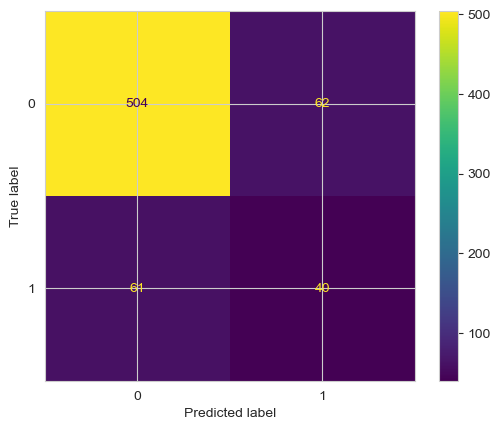

In [34]:
#checking the metric of baseline model and draw confusion matrix using above function 
evaluate_model_metrics(logreg, X_test,y_test)

* from above it can be seen that `roc_auc` value is `0.6432494839589965`, the ROC AUC score is closer to 1 than 0.5, indicating that the model has some ability to discriminate between the positive and negative classes.
* Confusion matrix is used to display the predcited and true labels of logistic regression model where the True positives `40`, False negative `61`, True Negative `504` and False positive `62` 
* It can be seen that the model is not much accurate in making prediction from the matrix

### Cross validation score to see if it improves model perfomance

In [35]:
# Create an instance of Logistic Regression
logreg2 = LogisticRegression()

# Fit the model on the resampled training data
logreg2.fit(X_train_resampled, y_train_resampled)

# Compute cross-validation scores picking 5 folds 
scores = cross_val_score(logreg2, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print the scores
print("Cross-validation scores:", scores)

# Compute the mean score
mean_score = scores.mean()
print(mean_score)




Cross-validation scores: [0.66083151 0.92778993 0.9321663  0.91128149 0.90909091]
0.868232028971266


* It can be seen that after using cross validation and picking `5` folds we get an improved model with accuracy mean of `0.868232028971266` which represents `86.8%` accuracy level in prediction customer churn.
* Hence cross validation improves our model and makes it better but to to the required standards.
* Therefore from the we can proceed the second model to check its perfomance in predicting customer churn and check if its a good perfomer than logistic regresion 

## Building Decison Trees clasifier model

In [36]:
#Create an instance of decion tree classifier
clf = DecisionTreeClassifier()

# Fit the model on the training data
clf.fit(X_train_resampled, y_train_resampled)

# Predict on the testing data
y_pred = clf.predict(X_test)


{'roc_auc': 0.8891736346779554,
 'accuracy': 0.9085457271364318,
 'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x28c4d3675e0>}

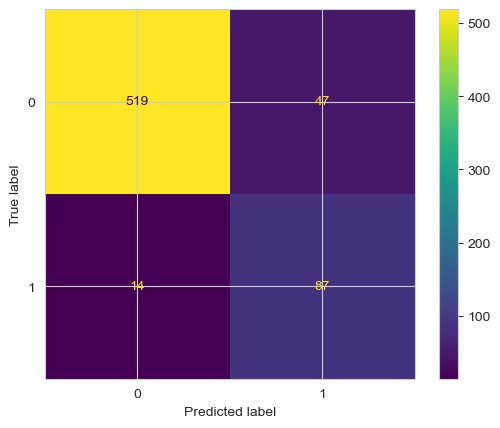

In [37]:
#checking for decison tree metrics using the predefiend function 
evaluate_model_metrics(clf, X_test, y_test)

* In this case, the ROC AUC score of `0.883` suggests that the model has a high discriminatory ability and is able to effectively separate the classes.

* Accuracy: The accuracy score of `0.906` indicates that the model has a high percentage of correct predictions. 
* This metrics show that Decision tree model is a better predictor of customer churn than the baseline logistic regression model 
* From the confusion matrix it can be seen that TP `86`, TN `519`, FP `47` and FN `15`, hence there is improved prediction here 
* To get futher insights we will check the classification report of all the metrics related to Decison Tree classifier

In [38]:
#using predefined function to check for classification report
generate_classification_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.973734,0.916961,0.944495,566.000000
1,0.649254,0.861386,0.740426,101.000000
accuracy,0.908546,0.908546,0.908546,0.908546
macro avg,0.811494,0.889174,0.842460,667.000000
weighted avg,0.924599,0.908546,0.913594,667.000000


* Class 0 has a high precision of `0.971910`, indicating that when the model predicts Class 0, it is often correct. The recall for Class 0 is `0.916961`, which means the model is able to capture a good proportion of actual Class 0 instances. The F1-score for Class 0 is `0.943636`, which balances precision and recall.

* Class 1 has a lower precision of `0.646617`, suggesting that the model is less accurate in predicting Class 1 instances. However, the recall for Class 1 is `0.851485`, indicating that the model captures a relatively higher proportion of actual Class 1 instances. The F1-score for Class 1 is `0.735043`, representing a balance between precision and recall.

* The overall accuracy of the model is `0.907046`, which means that around `90.7%` of the predictions are correct. This indicates that the model performs reasonably well in terms of overall accuracy than logistic regression model

## Building a random forest model

In [39]:
#instantiate the random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the model on the training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the testing data
y_pred = clf.predict(X_test)



{'roc_auc': 0.8891736346779554,
 'accuracy': 0.9085457271364318,
 'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x28c4bb16d60>}

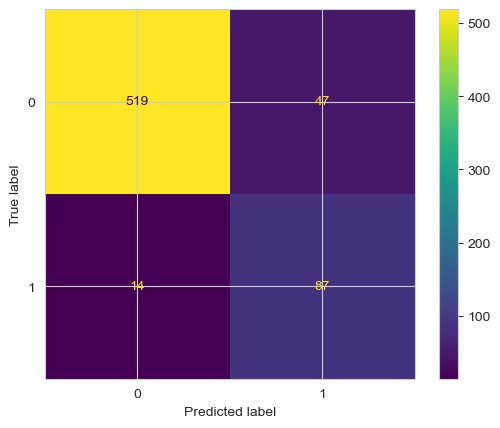

In [40]:
#checking for random forest metrics using the predefiend function 
evaluate_model_metrics(clf, X_test, y_test)

* In this case of random forest classifier, the ROC AUC is `0.8851065318545989`, which suggests that the model has a reasonably good ability to discriminate between the classes and is slightly better than decision tree classifier.

* Accuracy: Accuracy is a commonly used metric that measures the proportion of correct predictions out of all predictions. It provides an overall assessment of the model's performance. The accuracy in this case is `0.9085457271364318`, indicating that approximately 90.9% of the predictions are correct.
* This accuracy is slightly higher than the one for Decison tree classifier

In [41]:
generate_classification_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.973734,0.916961,0.944495,566.000000
1,0.649254,0.861386,0.740426,101.000000
accuracy,0.908546,0.908546,0.908546,0.908546
macro avg,0.811494,0.889174,0.842460,667.000000
weighted avg,0.924599,0.908546,0.913594,667.000000


* Class 0 has a high precision of `0.971963`, indicating that when the model predicts Class 0, it is often correct. The recall for Class 0 is `0.918728`, meaning that the model captures a good proportion of actual Class 0 instances. The F1-score for Class 0 is 0.944596, representing a balanced measure of precision and recall.

* Class 1 has a lower precision of `0.651515`, suggesting that the model is less accurate in predicting Class 1 instances. However, the recall for Class 1 is `0.851485`, indicating that the model captures a relatively higher proportion of actual Class 1 instances. The F1-score for Class 1 is `0.738197`, representing a balance between precision and recall.

* The overall accuracy of the model is `0.908546`, indicating that approximately `90.9%` of the predictions are correct.

* Based on the three models it can be seen that logostic regression perfoms poorly in making predictions of customer churn. 
* Random forest clasifier and Decision trees perform pretty well with `90.9%` and `90.8%` resectively. 
* Hence it is relevant to improve the random forest clasifier model using hyperparatemeters to achieve the best accuracy. 
* Hyperparameter is perfect tool for increasing efficiency and perfomance of models. 


## Hyperparameter Tuning 
* Hyperparameters are parameters that are not learned from the data but are set prior to training the model.
* They control aspects such as model complexity, regularization, learning rate, and number of iterations.
* Since our best model from the above 3 is Random forest clasifier we will use this `Gridsearch` to improve its perfomance 

In [42]:
# Create an instance of the Random Forest classifier
rf = RandomForestClassifier()

# Defining the parameter grid for grid search
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=multiprocessing.cpu_count())
# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

# Get the best model found during the grid search
best_model = grid_search.best_estimator_
# Predict on the test data using the best model
y_pred = best_model.predict(X_test)
# Computing the accuracy
accuracy = best_model.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)
print('--------------')
print(best_params)




Accuracy: 0.9730134932533733
--------------
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}


* After tuning the parameters for the random forest classifier using grid search our model improved on its perfomance as explained below
- The accuracy of the random forest model is now at `0.974512743628186`, which indicates that the model correctly predicted the class labels for the test data with an accuracy of approximately `97.45%.` hence perfect for predicting customer churn. 


## Evaluation 

We have so far build three machine learning models to help us in predicting customer churn in Seriatel company. From the model we have tested the accuracy of the three models and determined that logistic regression performs poorly in our prediction despite applying cross validation with 5 folds to improve its perfomance it improved from `81.6%` to `86.8%.` 

We tried the other two model that is decision tree classifier and random forest which gave us accuracy level of 90.8% and 90.9% respepectively. We choose random forest since it was the best performing model among the two with difference of `0.01%.` From this it was paramount to improve the model futher by parameter tuning. Using grid search improved random forest classifier to `97.45%.`

In terms of the company's perspective and the prediction of customer churn, achieving an accuracy of approximately `97.45%` with the random forest model is a positive outcome and the Seriatel will benefit from this in the following manner: 
* Accurate Customer Churn Prediction: The high accuracy indicates that the model is effective in identifying customers who are likely to churn. This is valuable for Serial as it allows them to proactively take actions to retain those customers, potentially reducing customer attrition and its associated costs.

* Cost Savings: By accurately predicting customer churn, Seriatel telecom company will focus its resources on targeted retention strategies, such as personalized offers, loyalty programs, or improved customer service, for customers identified as at risk. This targeted approach can lead to cost savings compared to deploying retention efforts to the entire customer base.

* Customer Retention: The accurate prediction of customer churn enables the company to implement proactive measures to retain valuable customers. By intervening before customers churn, Seriatel has an opportunity to address their concerns, resolve issues, and provide incentives to encourage them to stay. This can contribute to maintaining a loyal customer base and potentially increasing customer satisfaction and loyalty.

* Business Strategy and Decision-Making: Accurate churn prediction provides insights into customer behavior and patterns. This information can help the company better understand the factors that contribute to customer churn and make informed business decisions. It allows for data-driven strategies, such as product or service improvements, customer experience enhancements, or targeted marketing campaigns, aimed at reducing churn and improving customer retention.




